In [525]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams

#### Prepare data for Visualizations

In [1]:
cpn = pd.read_csv('complete_politifact_news.csv')

In [290]:
cpn = cpn.drop(columns = ['Story', 'Statement', 'Article', 'Date'])
cpn.columns = ['source', 'label', 'date']

In [291]:
cpn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17730 entries, 0 to 17729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  17730 non-null  object
 1   label   17730 non-null  object
 2   date    17730 non-null  object
dtypes: object(3)
memory usage: 415.7+ KB


In [292]:
cpn['date'] = pd.to_datetime(cpn['date'])

In [293]:
cpn['label'] = cpn['label'].map({'pants-fire':0, 'false':1, 'barely-true':2, 'half-true':3, 'mostly-true':4, 'true':5})

In [294]:
# cpn.to_csv('viz_df.csv', index=False)

## Compare Trump to Biden

In [295]:
cpn = cpn[(cpn['source']=='Donald Trump') | (cpn['source']=='Joe Biden')]

In [296]:
# cpn.to_csv('./Donald-Biden.csv', index = False)

In [297]:
cpn.groupby('source').mean()

,label
source,
Donald Trump,1.763127
Joe Biden,2.853147


In [298]:
cpn['date'] = cpn['date'].dt.to_period('M')

In [299]:
cpn = cpn.groupby(['date','source'], as_index=False).mean()[-42:]

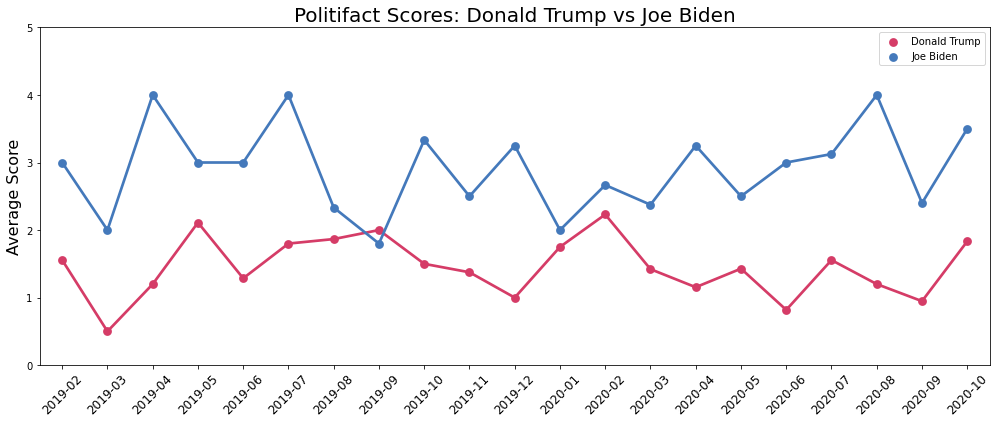

In [302]:
plt.figure(figsize=(14,6))
sns.pointplot(y='label', x='date', hue='source', data=cpn, palette=sns.diverging_palette(1, 250, n=2))
plt.title('Politifact Scores: Donald Trump vs Joe Biden', fontsize = 20)
plt.xlabel('')
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('Average Score', fontsize = 16)
plt.ylim((0,5))
plt.legend()
plt.tight_layout();
# plt.savefig('./Figures/Trump-Biden-Scores.png')

## Compare Highest Fact Checked Persons

In [2]:
highest = pd.read_csv('viz_df.csv')

In [376]:
highest['count'] = highest.groupby(['source'])['label'].transform('count')

highest = highest.drop(highest[highest['count']<100].index)[['source','label', 'count']].reset_index(drop=True)

In [388]:
highest = highest[(highest['source']!='Facebook posts')&
                  (highest['source']!='Bloggers')&
                  (highest['source']!='Viral image')&
                  (highest['source']!='Chain email')].reset_index().drop(['index'], axis=1)

In [389]:
highest = highest.groupby('source', as_index=False).mean()
highest['party'] = highest['source'].map({'Donald Trump':'R', 'Barack Obama':'D', 'Hillary Clinton':'D', 'Scott Walker':'R', 'Mitt Romney':'R', 'Rick Perry':'R', 'Bernie Sanders':'D', 'Marco Rubio':'R', 'Rick Scott':'R', 'John McCain':'R', 'Joe Biden':'D', 'Ted Cruz':'R'})

In [390]:
highest.sort_values(by='label', ascending=False, inplace=True)

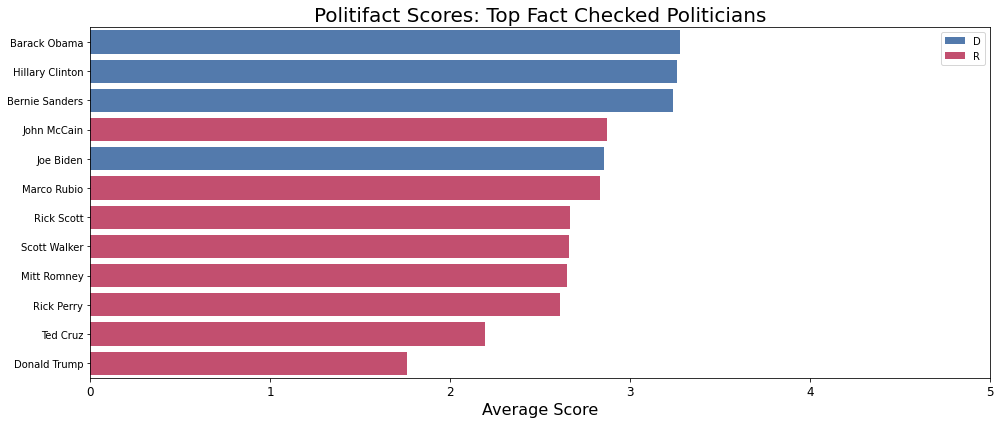

In [391]:
plt.figure(figsize=(14,6))
sns.barplot(y='source', x='label', hue='party', dodge=False, data=highest, palette=sns.diverging_palette(250, 1, n=2))
plt.title('Politifact Scores: Top Fact Checked Politicians', fontsize = 20)
plt.xlabel('Average Score', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlim((0,5))
plt.ylabel('')
plt.legend()
plt.tight_layout();
# plt.savefig('./Figures/Highest-Fact-Scores.png')

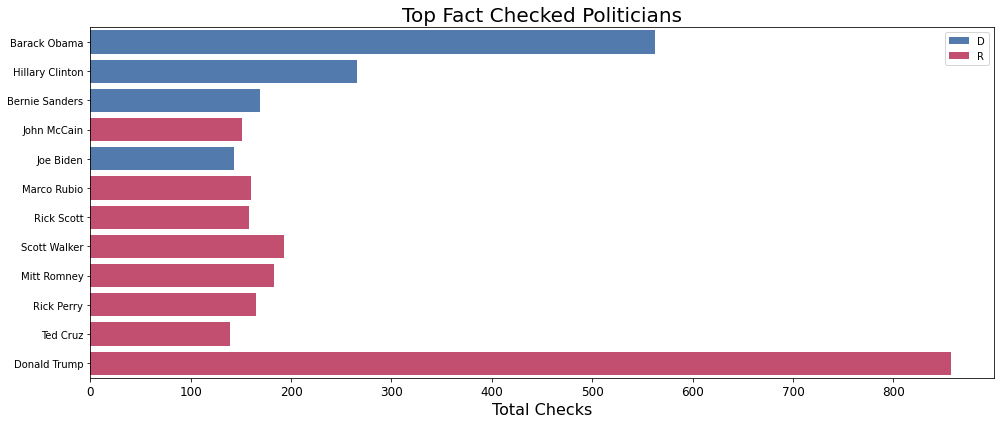

In [392]:
plt.figure(figsize=(14,6))
sns.barplot(y='source', x='count', hue='party', dodge=False, data=highest, palette=sns.diverging_palette(250, 1, n=2))
plt.title('Top Fact Checked Politicians', fontsize = 20)
plt.xlabel('Total Checks', fontsize = 16)
plt.xticks(fontsize = 12)
plt.ylabel('')
plt.legend()
plt.tight_layout();
# plt.savefig('./Figures/Highest-Fact-Check-Totals.png')

In [3]:
highest_2 = pd.read_csv('viz_df.csv')

In [477]:
highest_2['count'] = highest_2.groupby(['source'])['label'].transform('count')
highest_2 = highest_2.drop(highest_2[highest_2['count']<50].index)[['source','label', 'count', 'date']].reset_index(drop=True)

In [478]:
highest_2['source'].value_counts()

Facebook posts                                 901
Donald Trump                                   864
Barack Obama                                   583
Bloggers                                       571
Viral image                                    508
Hillary Clinton                                270
Scott Walker                                   207
Mitt Romney                                    193
Bernie Sanders                                 169
Rick Perry                                     169
Chain email                                    166
Rick Scott                                     165
Marco Rubio                                    165
John McCain                                    157
Joe Biden                                      144
Ted Cruz                                       141
Chris Christie                                  99
Newt Gingrich                                   83
Paul Ryan                                       83
Charlie Crist                  

In [479]:
highest_2 = highest_2[(highest_2['source']!='Facebook posts')&
                      (highest_2['source']!='Bloggers')&
                      (highest_2['source']!='Viral image')&
                      (highest_2['source']!='Chain email')&
                      (highest_2['source']!='National Republican Congressional Committee')].reset_index().drop(['index'], axis=1)

In [480]:
highest_2 = highest_2.groupby('source', as_index=False).mean()
highest_2['party'] = highest_2['source'].map({'Donald Trump':'R', 'Barack Obama':'D', 'Hillary Clinton':'D',
                                          'Scott Walker':'R', 'Mitt Romney':'R', 'Rick Perry':'R',
                                          'Bernie Sanders':'D', 'Marco Rubio':'R', 'Rick Scott':'R',
                                          'John McCain':'R', 'Joe Biden':'D', 'Ted Cruz':'R',
                                         'Chris Christie':'R', 'Newt Gingrich':'R', 'Paul Ryan':'R',
                                         'Charlie Crist':'D', 'Jeb Bush':'R', 'John Kasich':'R',
                                         'Ron Johnson':'R', 'John Boehner':'R', 'Greg Abbott':'R',
                                         'Rand Paul':'R', 'Rick Santorum':'R', 'Tim Kaine':'D', 
                                         'Sarah Palin':'R', 'Mike Pence':'R', 'Michele Bachmann':'R', 
                                         'Tammy Baldwin':'D'})

In [481]:
highest_2.sort_values(by='label', ascending=False, inplace=True)

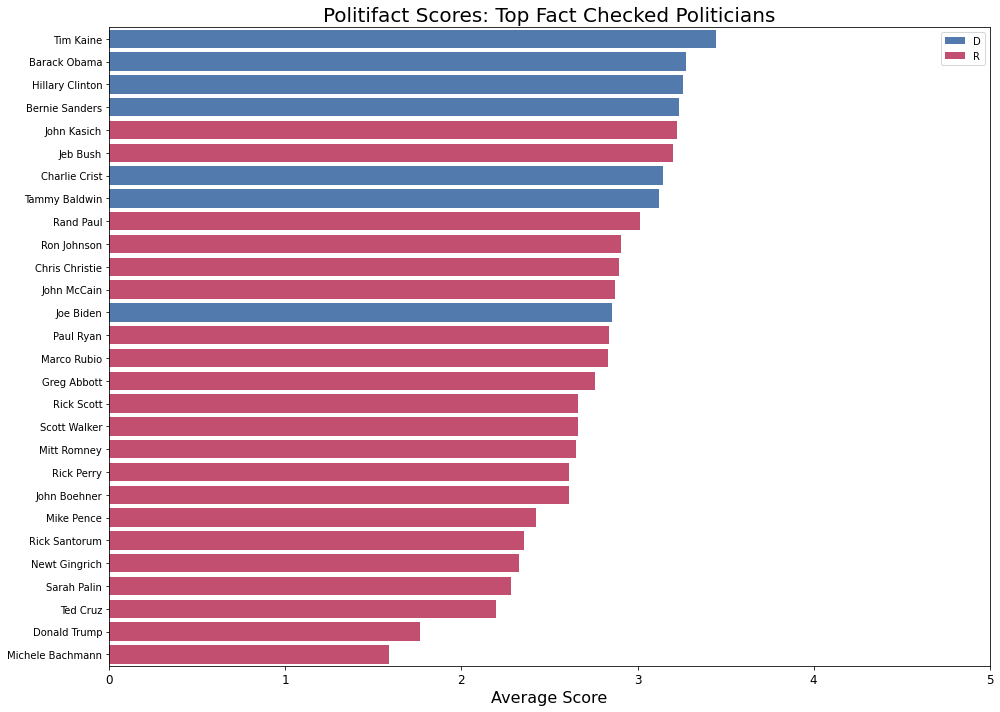

In [482]:
plt.figure(figsize=(14,10))
sns.barplot(y='source', x='label', hue='party', dodge=False, data=highest_2, palette=sns.diverging_palette(250, 1, n=2))
plt.title('Politifact Scores: Top Fact Checked Politicians', fontsize = 20)
plt.xlabel('Average Score', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlim((0,5))
plt.ylabel('')
plt.legend()
plt.tight_layout();
# plt.savefig('./Figures/Highest-Fact-Scores-Total.png')

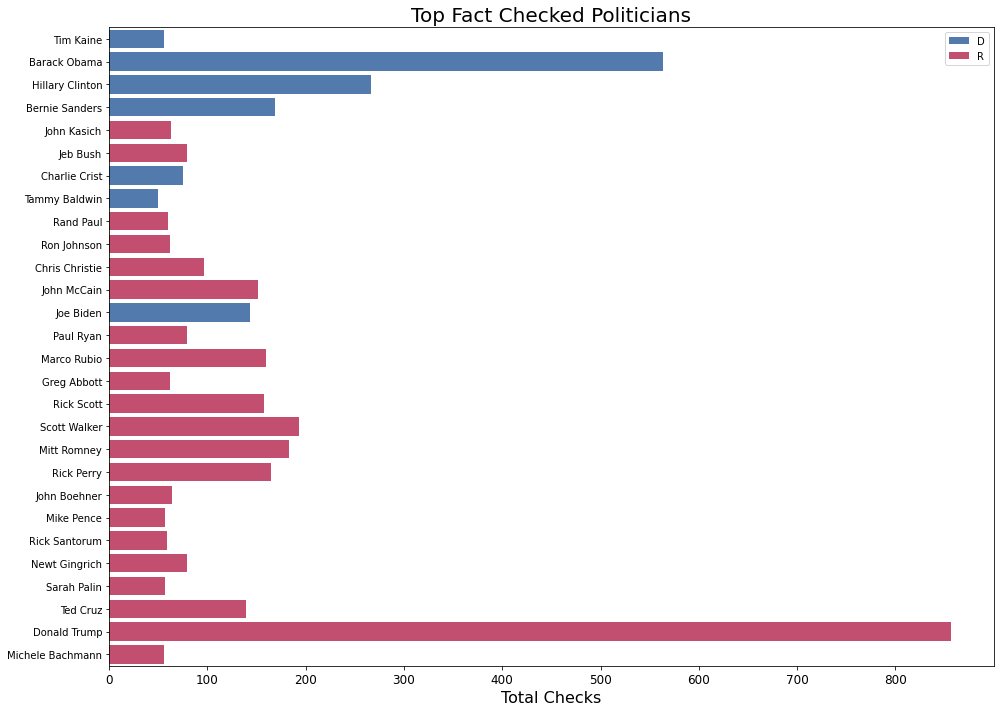

In [483]:
plt.figure(figsize=(14,10))
sns.barplot(y='source', x='count', hue='party', dodge=False, data=highest_2, palette=sns.diverging_palette(250, 1, n=2))
plt.title('Top Fact Checked Politicians', fontsize = 20)
plt.xlabel('Total Checks', fontsize = 16)
plt.xticks(fontsize = 12)
plt.ylabel('')
plt.legend()
plt.tight_layout();
# plt.savefig('./Figures/Highest-Fact-Check-Totals-Final.png')

In [4]:
highest_2 = pd.read_csv('viz_df.csv')

In [485]:
highest_2['count'] = highest_2.groupby(['source'])['label'].transform('count')
highest_2 = highest_2.drop(highest_2[highest_2['count']<50].index)[['source','label', 'count', 'date']].reset_index(drop=True)

In [486]:
highest_2 = highest_2[(highest_2['source']!='Facebook posts')&
                      (highest_2['source']!='Bloggers')&
                      (highest_2['source']!='Viral image')&
                      (highest_2['source']!='Chain email')&
                      (highest_2['source']!='National Republican Congressional Committee')].reset_index().drop(['index'], axis=1)

In [487]:
highest_2['party'] = highest_2['source'].map({'Donald Trump':'R', 'Barack Obama':'D', 'Hillary Clinton':'D',
                                          'Scott Walker':'R', 'Mitt Romney':'R', 'Rick Perry':'R',
                                          'Bernie Sanders':'D', 'Marco Rubio':'R', 'Rick Scott':'R',
                                          'John McCain':'R', 'Joe Biden':'D', 'Ted Cruz':'R',
                                         'Chris Christie':'R', 'Newt Gingrich':'R', 'Paul Ryan':'R',
                                         'Charlie Crist':'D', 'Jeb Bush':'R', 'John Kasich':'R',
                                         'Ron Johnson':'R', 'John Boehner':'R', 'Greg Abbott':'R',
                                         'Rand Paul':'R', 'Rick Santorum':'R', 'Tim Kaine':'D', 
                                         'Sarah Palin':'R', 'Mike Pence':'R', 'Michele Bachmann':'R', 
                                         'Tammy Baldwin':'D'})

In [488]:
highest_2['date'] = pd.to_datetime(highest_2['date'])
highest_2['date'] = highest_2['date'].dt.to_period('Y')

In [489]:
highest_2 = highest_2.groupby(['party','date'], as_index=False).mean()

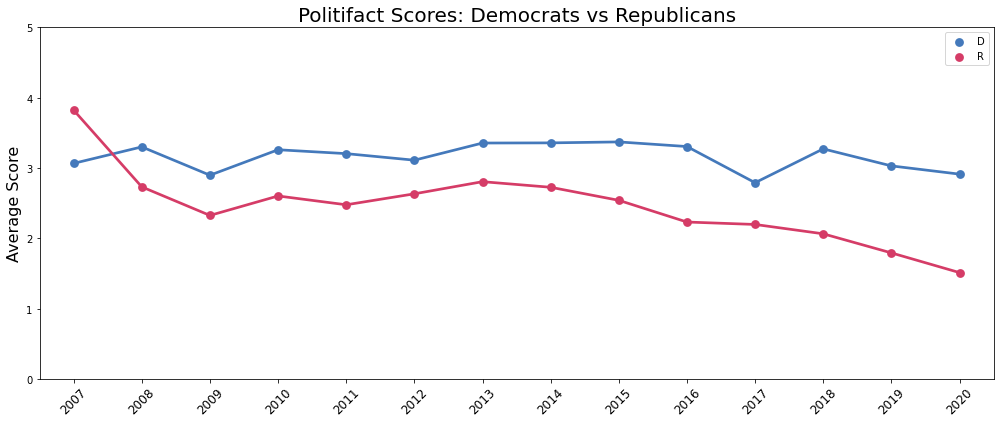

In [491]:
plt.figure(figsize=(14,6))
sns.pointplot(y='label', x='date', hue='party', data=highest_2, palette=sns.diverging_palette(250, 1, n=2))
plt.title('Politifact Scores: Democrats vs Republicans', fontsize = 20)
plt.xlabel('')
plt.xticks(rotation=45, fontsize = 12)
plt.ylabel('Average Score', fontsize = 16)
plt.ylim((0,5))
plt.legend()
plt.tight_layout();
# plt.savefig('./Figures/Party-Scores.png')

## N-Grams

In [492]:
cpn = pd.read_csv('complete_politifact_news.csv')
cpn.head()

,Story,Statement,Article,Date,Source,Label,date
0,An ad from a group opposing a constitutional a...,Approving the constitutional amendment on Illi...,https://www.politifact.com/factchecks/2020/oct...,"October 4, 2020",Coalition to Stop the Proposed Tax Hike Amendment,half-true,2020/oct/04
1,As Donald Trump fights to recover from the cor...,Says Donald Trump is not at Walter Reed Nation...,https://www.politifact.com/factchecks/2020/oct...,"October 4, 2020",Facebook posts,pants-fire,2020/oct/04
2,Even with President Donald Trump hospitalized ...,Says Joe Biden stays in his basement.,https://www.politifact.com/factchecks/2020/oct...,"October 4, 2020",Jason MIller,false,2020/oct/04
3,Gov. Phil Scott came out firing when the issue...,"“That 5% (wealth tax) starts at $159,000 per f...",https://www.politifact.com/factchecks/2020/oct...,"October 4, 2020",Phil Scott,true,2020/oct/04
4,"In one photo, President Donald Trump’s right b...","Says Donald Trump boarded Marine One ""with a p...",https://www.politifact.com/factchecks/2020/oct...,"October 4, 2020",Facebook posts,false,2020/oct/04


In [494]:
cpn['Label'] = cpn['Label'].map({'pants-fire':0, 'false':0, 'barely-true':0, 'half-true':1, 'mostly-true':1, 'true':1})

In [520]:
cpn.dropna(inplace=True)

In [521]:
true = cpn[cpn['Label']==1].reset_index(drop=True)
false = cpn[cpn['Label']==0].reset_index(drop=True)

In [522]:
def to_words(series):
    ps = PorterStemmer()
    corpus = []
    start = time.time()
    for i in range(0, len(series)):
        letters = re.sub('[^a-zA-Z]', ' ',series[i])
        words = letters.lower().split()
        meaningful_words = [ps.stem(w) for w in words if not w in stopwords.words('english')]
        final = ' '.join(meaningful_words)
        corpus.append(final)
    end = time.time()
    print(f'Time Elapsed: {round(end - start, 2)} seconds')
    return corpus

In [523]:
true_words = to_words(true['Story'])

Time Elapsed: 1103.34 seconds


In [524]:
false_words = to_words(false['Story'])

Time Elapsed: 1316.87 seconds


In [534]:
true_words = ''.join(true_words)

In [550]:
true_series = pd.Series(nltk.ngrams(str.split(true_words), 2)).value_counts()[:20]

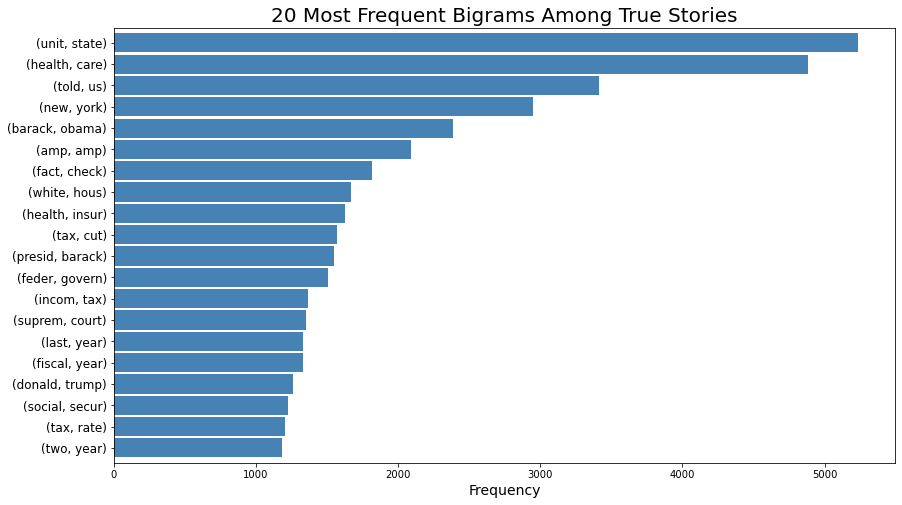

In [570]:
true_series.sort_values().plot.barh(color='steelblue', width=.9, figsize=(14, 8))
plt.title('20 Most Frequent Bigrams Among True Stories', fontsize=20)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=12);
# plt.savefig('./Figures/True-Bigrams.png')

In [558]:
false_words = ''.join(false_words)

In [559]:
false_series = pd.Series(nltk.ngrams(str.split(false_words), 2)).value_counts()[:20]

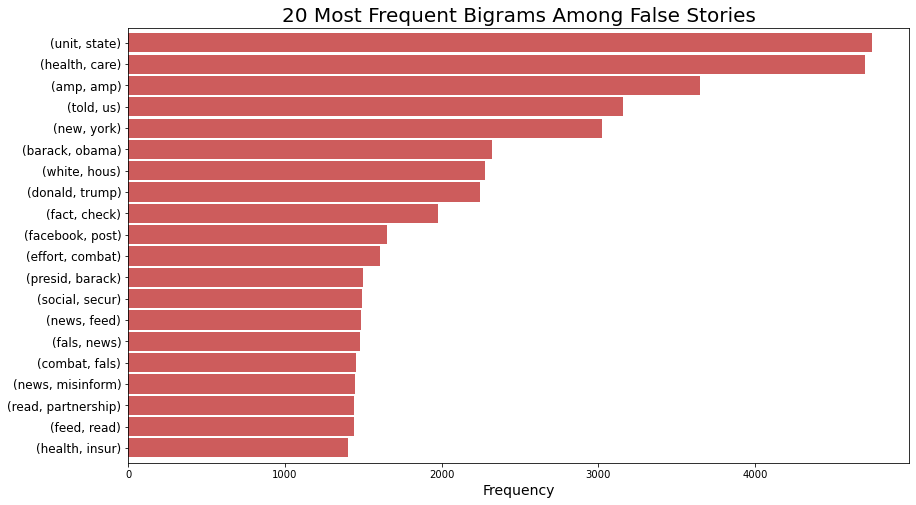

In [571]:
false_series.sort_values().plot.barh(color='indianred', width=.9, figsize=(14, 8))
plt.title('20 Most Frequent Bigrams Among False Stories', fontsize=20)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=12);
# plt.savefig('./Figures/False-Bigrams.png')